# **Importando as Bibliotecas**

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import cvxpy as cp
from skimage.util import random_noise as imnoise
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# **Subindo Imagens e tranformando em Tons de Cinza**

In [12]:
ICA = imread('imageio:coffee.png')
ICB = imread('imageio:chelsea.png')
ICC = imread('imageio:hubble_deep_field.png')
ICD = imread('imageio:immunohistochemistry.png')
ICE = imread('imageio:wikkie.png')
ICF = imread('imageio:astronaut.png')
A = cv.cvtColor(ICA, cv.COLOR_BGR2GRAY)
B = cv.cvtColor(ICB, cv.COLOR_BGR2GRAY)
C = cv.cvtColor(ICC, cv.COLOR_BGR2GRAY)
D = cv.cvtColor(ICD, cv.COLOR_BGR2GRAY)
E = cv.cvtColor(ICE, cv.COLOR_BGR2GRAY)
F = cv.cvtColor(ICF, cv.COLOR_BGR2GRAY)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22700\3991268644.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ICA = imread('imageio:coffee.png')


Imageio: 'coffee.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.840960/451102 bytes (9.1%122880/451102 bytes (27.2%253952/451102 bytes (56.3%376832/451102 bytes (83.5%451102/451102 bytes (100.0%)
  Done
File saved as C:\Users\DELL\AppData\Local\imageio\images\coffee.png.
Imageio: 'chelsea.png' was not found on your computer; downloading it now.


C:\Users\DELL\AppData\Local\Temp\ipykernel_22700\3991268644.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ICB = imread('imageio:chelsea.png')


Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/chelsea.png (216 kB)
Downloading: 8192/221294 bytes (3.740960/221294 bytes (18.5122880/221294 bytes (55.5%221294/221294 bytes (100.0%)
  Done
File saved as C:\Users\DELL\AppData\Local\imageio\images\chelsea.png.
Imageio: 'hubble_deep_field.png' was not found on your computer; downloading it now.


C:\Users\DELL\AppData\Local\Temp\ipykernel_22700\3991268644.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ICC = imread('imageio:hubble_deep_field.png')


Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/hubble_deep_field.png (1.6 MB)
Downloading: 8192/1668706 bytes (0.5%40960/1668706 bytes (2.5106496/1668706 bytes (6.4%188416/1668706 bytes (11.3286720/1668706 bytes (17.2385024/1668706 bytes (23.1729088/1668706 bytes (43.7942080/1668706 bytes (56.51269760/1668706 bytes (76.1%1490944/1668706 bytes (89.3%1668706/1668706 bytes (100.0%)
  Done
File saved as C:\Users\DELL\AppData\Local\imageio\images\hubble_deep_field.png.
Imageio: 'immunohistochemistry.png' was not found on your computer; downloading it now.


C:\Users\DELL\AppData\Local\Temp\ipykernel_22700\3991268644.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ICD = imread('imageio:immunohistochemistry.png')


Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/immunohistochemistry.png (459 kB)
Downloading: 8192/470201 bytes (1.732768/470201 bytes (7.0%114688/470201 bytes (24.4%212992/470201 bytes (45.3%294912/470201 bytes (62.7%401408/470201 bytes (85.4%458752/470201 bytes (97.6%470201/470201 bytes (100.0%)
  Done
File saved as C:\Users\DELL\AppData\Local\imageio\images\immunohistochemistry.png.
Imageio: 'wikkie.png' was not found on your computer; downloading it now.


C:\Users\DELL\AppData\Local\Temp\ipykernel_22700\3991268644.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ICE = imread('imageio:wikkie.png')


Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/wikkie.png (461 kB)
Downloading: 8192/472047 bytes (1.740960/472047 bytes (8.7%122880/472047 bytes (26.0%253952/472047 bytes (53.8%401408/472047 bytes (85.0%472047/472047 bytes (100.0%)
  Done
File saved as C:\Users\DELL\AppData\Local\imageio\images\wikkie.png.
Imageio: 'astronaut.png' was not found on your computer; downloading it now.


C:\Users\DELL\AppData\Local\Temp\ipykernel_22700\3991268644.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ICF = imread('imageio:astronaut.png')


Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/astronaut.png (773 kB)
Downloading: 8192/791555 bytes (1.040960/791555 bytes (5.2%122880/791555 bytes (15.5%253952/791555 bytes (32.1%385024/791555 bytes (48.6%450560/791555 bytes (56.9%581632/791555 bytes (73.5%696320/791555 bytes (88.0%791555/791555 bytes (100.0791555/791555 bytes (100.0%)
  Done
File saved as C:\Users\DELL\AppData\Local\imageio\images\astronaut.png.


# **Medida de Irregularidade**

In [13]:
def irregularidade(I,J):
  hI = cv.calcHist([I], [0], None, [256], [0, 256])
  hJ = cv.calcHist([J], [0], None, [256], [0, 256])

  c = np.zeros((256,256))

  for i in range(256):
    for j in range(256):
      c[i,j] = abs(i-j)

  x = cp.Variable((256,256), nonneg=True)
  obj = cp.Minimize(cp.sum(cp.multiply(c, x)))
  r = [cp.sum(x, axis=1) == hI.flatten(), cp.sum(x, axis=0) == hJ.flatten()]
  prob = cp.Problem(obj, r)
  dW = prob.solve()

  d = np.sum(np.abs(1.0*I-1.0*J))

  valor = (d-dW)/d

  return valor

# **Medida de Irregularidade para imagens com Ruído Gaussiano**

In [14]:
def gaussiano(I):
  X1 = []
  Y1 = []

  for k in 10**(np.linspace(-5, np.log10(0.5), num=51)):
    J = (255*(imnoise(I, mode = "gaussian", var = k))).astype(np.uint8)
    y1 = irregularidade(I,J)
    x1 = k

    X1.append(x1)
    Y1.append(y1)

  return X1,Y1

# **Medida de Irregularidade para imagens com Ruído Sal e Pimenta**

In [15]:
def sap(I):
  X2 = []
  Y2 = []

  for k in 10**(np.linspace(-5, np.log10(0.5), num=51)):
    J = (255*(imnoise(I, mode = "s&p", amount = k))).astype(np.uint8)
    y2 = irregularidade(I,J)
    x2 = k

    X2.append(x2)
    Y2.append(y2)

  return X2,Y2

# **SSIM para imagens com Ruído Gaussiano**

In [16]:
def gaussianossim(I):
  X3 = []
  Y3 = []

  for k in 10**(np.linspace(-5, np.log10(0.5), num=51)):
    J = (255*(imnoise(I, mode = "gaussian", var = k))).astype(np.uint8)
    y3 = ssim(I, J)
    x3 = k

    X3.append(x3)
    Y3.append(y3)

  return X3,Y3

# **SSIM para imagens com Ruído Sal e Pimenta**

In [18]:
def sapssim(I):
  X5 = []
  Y5 = []

  for k in 10**(np.linspace(-5, np.log10(0.5), num=51)):
    J = (255*(imnoise(I, mode = "s&p", amount = k))).astype(np.uint8)
    y5 = ssim(I, J)
    x5 = k

    X5.append(x5)
    Y5.append(y5)

  return X5,Y5

# **PSNR para imagens com Ruído Gaussiano**

In [19]:
def gaussianopsnr(I):
  X4 = []
  Y4 = []

  for k in 10**(np.linspace(-5, np.log10(0.5), num=51)):
    J = (255*(imnoise(I, mode = "gaussian", var = k))).astype(np.uint8)
    y4 = psnr(I, J, data_range=None)
    x4 = k

    X4.append(x4)
    Y4.append(y4)

  return X4,Y4

# **PSNR para imagens com Ruído Sal e Pimenta**

In [20]:
def sappsnr(I):
  X6 = []
  Y6 = []

  for k in 10**(np.linspace(-5, np.log10(0.5), num=51)):
    J = (255*(imnoise(I, mode = "s&p", amount = k))).astype(np.uint8)
    y6 = psnr(I, J, data_range=None)
    x6 = k

    X6.append(x6)
    Y6.append(y6)

  return X6,Y6

# **Aplicando as funções nas Imagens**

In [22]:
X11, Y11 = gaussiano(A)
X12, Y12 = gaussiano(B)
X13, Y13 = gaussiano(C)
X14, Y14 = gaussiano(D)
X15, Y15 = gaussiano(E)
X16, Y16 = gaussiano(F)

In [23]:
X21, Y21 = sap(A)
X22, Y22 = sap(B)
X23, Y23 = sap(C)
X24, Y24 = sap(D)
X25, Y25 = sap(E)
X26, Y26 = sap(F)

In [24]:
X31, Y31 = gaussianossim(A)
X32, Y32 = gaussianossim(B)
X33, Y33 = gaussianossim(C)
X34, Y34 = gaussianossim(D)
X35, Y35 = gaussianossim(E)
X36, Y36 = gaussianossim(F)

In [25]:
X41, Y41 = gaussianopsnr(A)
X42, Y42 = gaussianopsnr(B)
X43, Y43 = gaussianopsnr(C)
X44, Y44 = gaussianopsnr(D)
X45, Y45 = gaussianopsnr(E)
X46, Y46 = gaussianopsnr(F)

In [26]:
X51, Y51 = sapssim(A)
X52, Y52 = sapssim(B)
X53, Y53 = sapssim(C)
X54, Y54 = sapssim(D)
X55, Y55 = sapssim(E)
X56, Y56 = sapssim(F)

In [27]:
X61, Y61 = sappsnr(A)
X62, Y62 = sappsnr(B)
X63, Y63 = sappsnr(C)
X64, Y64 = sappsnr(D)
X65, Y65 = sappsnr(E)
X66, Y66 = sappsnr(F)

# **Plotando os resultados - Medida de Irregularidade**

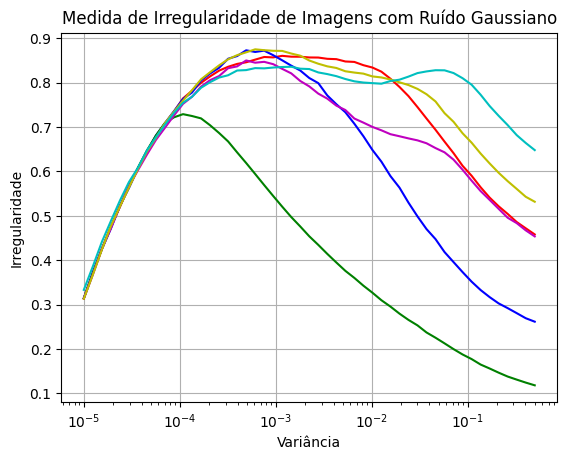

In [28]:
plt.plot(X11,Y11, color ='r', label='Imagem A')
plt.plot(X12,Y12, color ='b', label='Imagem B')
plt.plot(X13,Y13, color ='g', label='Imagem C')
plt.plot(X14,Y14, color ='m', label='Imagem D')
plt.plot(X15,Y15, color ='y', label='Imagem E')
plt.plot(X16,Y16, color ='c', label='Imagem F')
plt.xscale("log")
plt.xlabel('Variância')
plt.ylabel('Irregularidade')
plt.title('Medida de Irregularidade de Imagens com Ruído Gaussiano')
plt.grid()
plt.show()

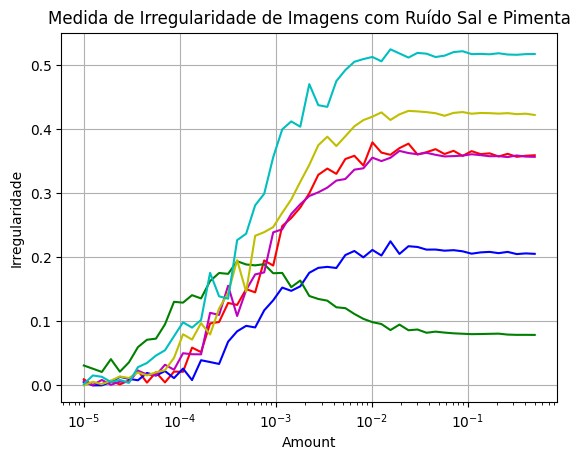

In [29]:
plt.plot(X21,Y21, color ='r', label='Imagem A')
plt.plot(X22,Y22, color ='b', label='Imagem B')
plt.plot(X23,Y23, color ='g', label='Imagem C')
plt.plot(X24,Y24, color ='m', label='Imagem D')
plt.plot(X25,Y25, color ='y', label='Imagem E')
plt.plot(X26,Y26, color ='c', label='Imagem F')
plt.xscale("log")
plt.xlabel('Amount')
plt.ylabel('Irregularidade')
plt.title('Medida de Irregularidade de Imagens com Ruído Sal e Pimenta')
plt.grid()
plt.show()

# **Plotando os resultados - SSIM**

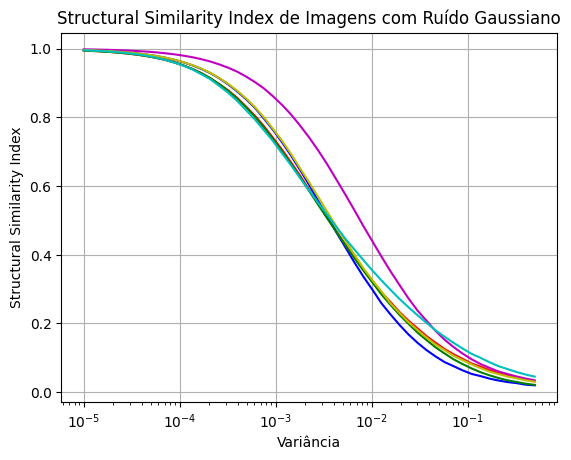

In [30]:
plt.plot(X31,Y31, color ='r', label='Imagem A')
plt.plot(X32,Y32, color ='b', label='Imagem B')
plt.plot(X33,Y33, color ='g', label='Imagem C')
plt.plot(X34,Y34, color ='m', label='Imagem D')
plt.plot(X35,Y35, color ='y', label='Imagem E')
plt.plot(X36,Y36, color ='c', label='Imagem F')
plt.xscale("log")
plt.xlabel('Variância')
plt.ylabel('Structural Similarity Index')
plt.title('Structural Similarity Index de Imagens com Ruído Gaussiano')
plt.grid()
plt.show()

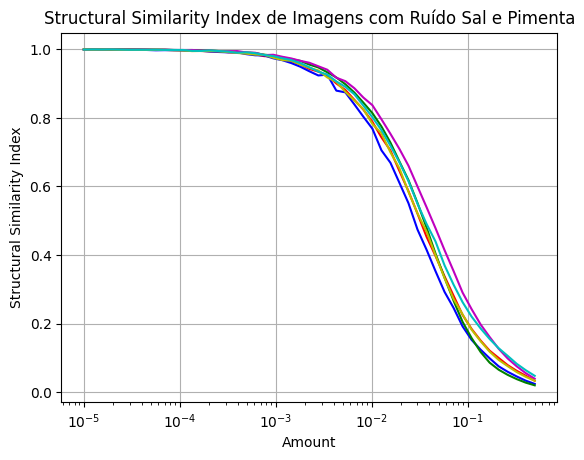

In [31]:
plt.plot(X51,Y51, color ='r', label='Imagem A')
plt.plot(X52,Y52, color ='b', label='Imagem B')
plt.plot(X53,Y53, color ='g', label='Imagem C')
plt.plot(X54,Y54, color ='m', label='Imagem D')
plt.plot(X55,Y55, color ='y', label='Imagem E')
plt.plot(X56,Y56, color ='c', label='Imagem F')
plt.xscale("log")
plt.xlabel('Amount')
plt.ylabel('Structural Similarity Index')
plt.title('Structural Similarity Index de Imagens com Ruído Sal e Pimenta')
plt.grid()
plt.show()

# **Plotando os resultados - PSNR**

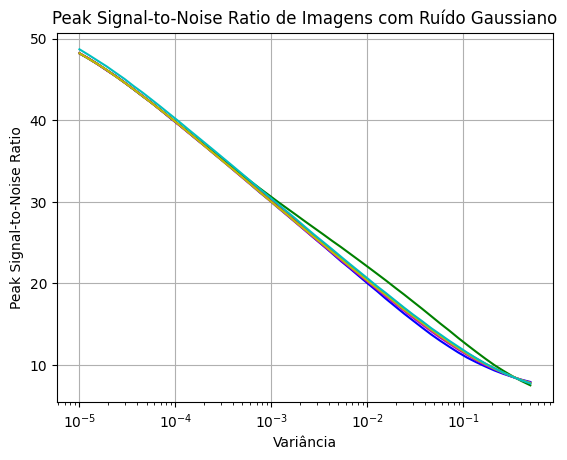

In [32]:
plt.plot(X41,Y41, color ='r', label='Imagem A')
plt.plot(X42,Y42, color ='b', label='Imagem B')
plt.plot(X43,Y43, color ='g', label='Imagem C')
plt.plot(X44,Y44, color ='m', label='Imagem D')
plt.plot(X45,Y45, color ='y', label='Imagem E')
plt.plot(X46,Y46, color ='c', label='Imagem F')
plt.xscale("log")
plt.xlabel('Variância')
plt.ylabel('Peak Signal-to-Noise Ratio')
plt.title('Peak Signal-to-Noise Ratio de Imagens com Ruído Gaussiano')
plt.grid()
plt.show()

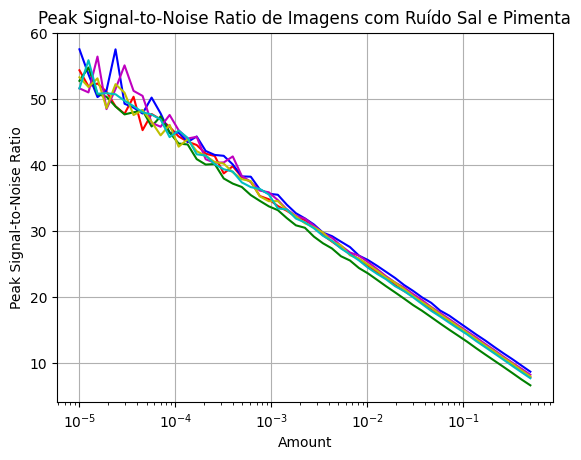

In [33]:
plt.plot(X61,Y61, color ='r', label='Imagem A')
plt.plot(X62,Y62, color ='b', label='Imagem B')
plt.plot(X63,Y63, color ='g', label='Imagem C')
plt.plot(X64,Y64, color ='m', label='Imagem D')
plt.plot(X65,Y65, color ='y', label='Imagem E')
plt.plot(X66,Y66, color ='c', label='Imagem F')
plt.xscale("log")
plt.xlabel('Amount')
plt.ylabel('Peak Signal-to-Noise Ratio')
plt.title('Peak Signal-to-Noise Ratio de Imagens com Ruído Sal e Pimenta')
plt.grid()
plt.show()

# **Medida de Irregularidade VS SSIM**

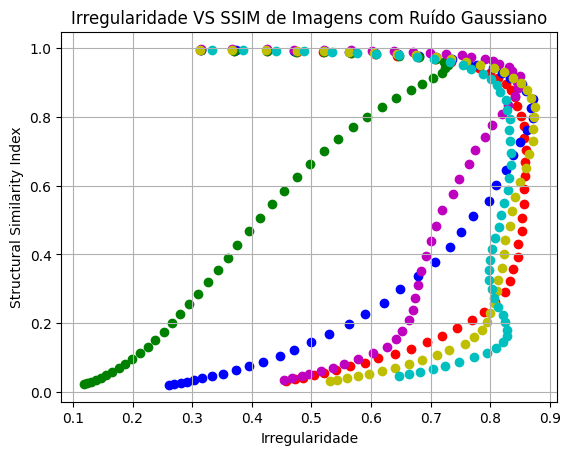

In [34]:
plt.scatter(Y11,Y31, color = 'r')
plt.scatter(Y12,Y32, color = 'b')
plt.scatter(Y13,Y33, color = 'g')
plt.scatter(Y14,Y34, color = 'm')
plt.scatter(Y15,Y35, color = 'y')
plt.scatter(Y16,Y36, color = 'c')
plt.xlabel('Irregularidade')
plt.ylabel('Structural Similarity Index')
plt.title('Irregularidade VS SSIM de Imagens com Ruído Gaussiano')
plt.grid()

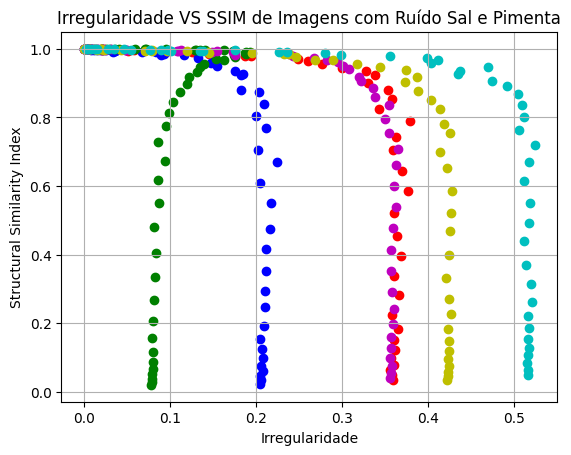

In [35]:
plt.scatter(Y21,Y51, color = 'r')
plt.scatter(Y22,Y52, color = 'b')
plt.scatter(Y23,Y53, color = 'g')
plt.scatter(Y24,Y54, color = 'm')
plt.scatter(Y25,Y55, color = 'y')
plt.scatter(Y26,Y56, color = 'c')
plt.xlabel('Irregularidade')
plt.ylabel('Structural Similarity Index')
plt.title('Irregularidade VS SSIM de Imagens com Ruído Sal e Pimenta')
plt.grid()